*Vraj* *Patel*

NN Coding Practice Projects

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv("Admission_Predict.csv")

In [3]:
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         400 non-null    int64  
 1   GRE Score          400 non-null    int64  
 2   TOEFL Score        400 non-null    int64  
 3   University Rating  400 non-null    int64  
 4   SOP                400 non-null    float64
 5   LOR                400 non-null    float64
 6   CGPA               400 non-null    float64
 7   Research           400 non-null    int64  
 8   Chance of Admit    400 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 28.3 KB


In [5]:
df.shape

(400, 9)

we are not using standard scaler here, and instead we are using min max scaler, and the reason that we are using min max scaler is that for this data, we know the upper bound and lower bound for all the parameters. (like gre score cannot be greater than 320 or something like that)

In [6]:
df.drop(columns=['Serial No.'], inplace=True)

In [7]:
df.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


In [8]:
X = df.iloc[:,:-1]

In [12]:
y = df.iloc[:,-1]

In [13]:
X

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,337,118,4,4.5,4.5,9.65,1
1,324,107,4,4.0,4.5,8.87,1
2,316,104,3,3.0,3.5,8.00,1
3,322,110,3,3.5,2.5,8.67,1
4,314,103,2,2.0,3.0,8.21,0
...,...,...,...,...,...,...,...
395,324,110,3,3.5,3.5,9.04,1
396,325,107,3,3.0,3.5,9.11,1
397,330,116,4,5.0,4.5,9.45,1
398,312,103,3,3.5,4.0,8.78,0


In [14]:
y

,Chance of Admit
0,0.92
1,0.76
2,0.72
3,0.80
4,0.65
...,...
395,0.82
396,0.84
397,0.91
398,0.67


In [15]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.2)

In [16]:
X_train

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
267,314,107,3,3.0,3.5,8.17,1
172,322,110,4,4.0,5.0,9.13,1
43,332,117,4,4.5,4.0,9.10,0
390,314,102,2,2.0,2.5,8.24,0
220,313,103,3,4.0,4.0,8.75,0
...,...,...,...,...,...,...,...
150,334,114,4,4.0,4.0,9.43,1
370,310,103,2,2.5,2.5,8.24,0
140,329,110,2,4.0,3.0,9.15,1
253,335,115,4,4.5,4.5,9.68,1


In [17]:
X_test

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
193,336,118,5,4.5,5.0,9.53,1
292,302,99,2,1.0,2.0,7.97,0
207,310,102,3,3.5,4.0,8.02,1
266,312,105,2,2.0,2.5,8.45,0
274,315,100,1,2.0,2.5,7.95,0
...,...,...,...,...,...,...,...
0,337,118,4,4.5,4.5,9.65,1
17,319,106,3,4.0,3.0,8.00,1
215,330,116,5,5.0,4.5,9.36,1
71,336,112,5,5.0,5.0,9.76,1


In [19]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [20]:
import tensorflow
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [21]:
model = Sequential()

model.add(Dense(7, activation='relu', input_dim = 7))
model.add(Dense(1, activation='linear')) # since this is regression problem,the output's activation function will always be linear

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [22]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 7)              │            56 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │             8 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 64 (256.00 B)

 Trainable params: 64 (256.00 B)

 Non-trainable params: 0 (0.00 B)

In [25]:
model.compile(loss='mean_squared_error', optimizer='adam',metrics=['accuracy'])

In [26]:
history=model.fit(X_train_scaled, y_train, epochs=10, validation_split=0.2)

Epoch 1/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 59ms/step - accuracy: 0.0000e+00 - loss: 0.2222 - val_accuracy: 0.0000e+00 - val_loss: 0.1485
Epoch 2/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.0000e+00 - loss: 0.1878 - val_accuracy: 0.0000e+00 - val_loss: 0.1272
Epoch 3/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.0000e+00 - loss: 0.1706 - val_accuracy: 0.0000e+00 - val_loss: 0.1175
Epoch 4/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.0000e+00 - loss: 0.1545 - val_accuracy: 0.0000e+00 - val_loss: 0.1100
Epoch 5/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.0000e+00 - loss: 0.1566 - val_accuracy: 0.0000e+00 - val_loss: 0.1025
Epoch 6/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.0000e+00 - loss: 0.1291 - val_accuracy: 0.0000e+00 - val_loss: 0.0956
Epoch 7/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.0000e+00 - loss: 0.1283 - val_accuracy: 0.0000e+00 - val_loss: 0.0885
Epoch 8/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.0000e+

In [28]:
y_pred = model.predict(X_test_scaled)

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


In [29]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

-2.770283105125158

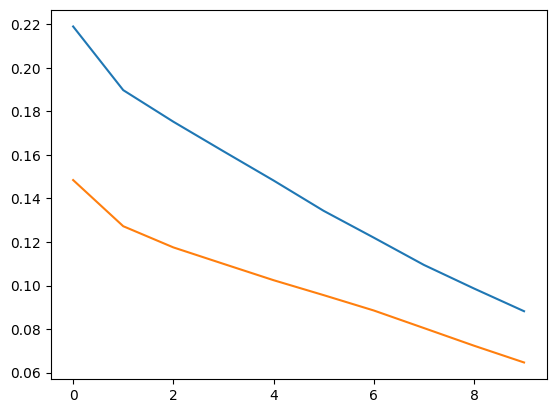

In [31]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

# Improving the model
simplying adding a dense layer and adding more epochs

In [32]:
model = Sequential()

model.add(Dense(7, activation='relu', input_dim = 7))
model.add(Dense(7, activation='relu', input_dim = 7))
model.add(Dense(1, activation='linear')) # since this is regression problem,the output's activation function will always be linear

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [33]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_2 (Dense)                 │ (None, 7)              │            56 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 7)              │            56 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 1)              │             8 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 120 (480.00 B)

 Trainable params: 120 (480.00 B)

 Non-trainable params: 0 (0.00 B)

In [34]:
model.compile(loss='mean_squared_error', optimizer='adam',metrics=['accuracy'])

In [35]:
history=model.fit(X_train_scaled, y_train, epochs=100, validation_split=0.2)

Epoch 1/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 72ms/step - accuracy: 0.0000e+00 - loss: 0.2318 - val_accuracy: 0.0000e+00 - val_loss: 0.1973
Epoch 2/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.0000e+00 - loss: 0.1557 - val_accuracy: 0.0000e+00 - val_loss: 0.1374
Epoch 3/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.0000e+00 - loss: 0.1078 - val_accuracy: 0.0000e+00 - val_loss: 0.0923
Epoch 4/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.0000e+00 - loss: 0.0747 - val_accuracy: 0.0000e+00 - val_loss: 0.0614
Epoch 5/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.0000e+00 - loss: 0.0465 - val_accuracy: 0.0000e+00 - val_loss: 0.0438
Epoch 6/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.0000e+00 - loss: 0.0361 - val_accuracy: 0.0000e+00 - val_loss: 0.0363
Epoch 7/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.0000e+00 - loss: 0.0257 - val_accuracy: 0.0000e+00 - val_loss: 0.0333
Epoch 8/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 

In [36]:
y_pred = model.predict(X_test_scaled)

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


In [37]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.756370718443514

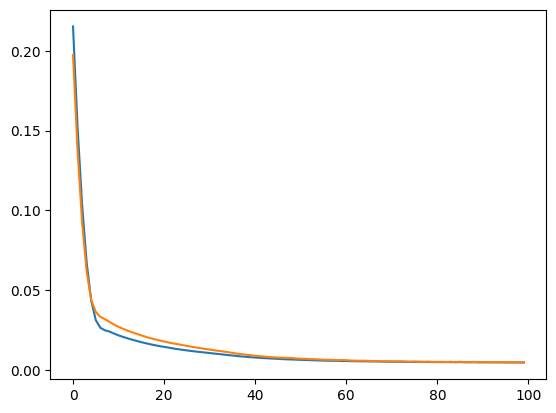

In [38]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])